In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sktime.forecasting.all import temporal_train_test_split
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("Divvy Time Series Dataset - Sheet1.csv")
df

,Year,Month,Total Counts,Classic Bike Count,Electric Bike Count,Docked Bike Count,Electric Scooter Count,Casual User Count,Member User Count
0,2020.0,4,84776,NaN,NaN,84776.0,NaN,23628,61148
1,NaN,5,200274,NaN,NaN,200274.0,NaN,86909,113365
2,NaN,6,343005,NaN,NaN,343005.0,NaN,154718,188287
3,NaN,7,551480,NaN,1935.0,549545.0,NaN,269296,282184
4,NaN,8,622361,NaN,66195.0,556166.0,NaN,289661,332700
5,NaN,9,532958,NaN,128352.0,404606.0,NaN,230692,302266
6,NaN,10,388653,NaN,152176.0,236477.0,NaN,145012,243641
7,NaN,11,259716,NaN,108134.0,151582.0,NaN,88099,171617
8,NaN,12,131573,70616.0,47953.0,13004.0,NaN,30080,101493
9,2021.0,1,96834,61700.0,33028.0,2106.0,NaN,18117,78717


In [13]:
ts = df['Casual User Count']

In [43]:
y_train, y_test = temporal_train_test_split(ts)

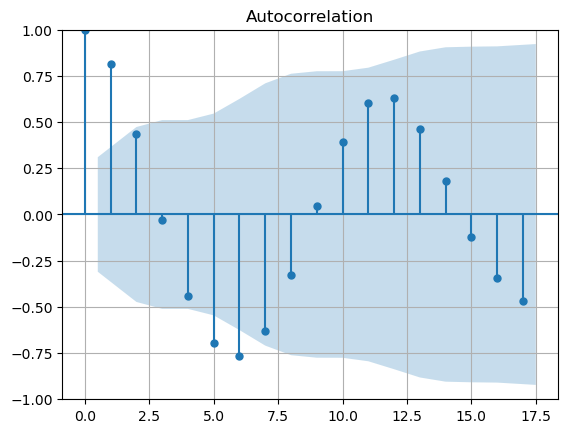

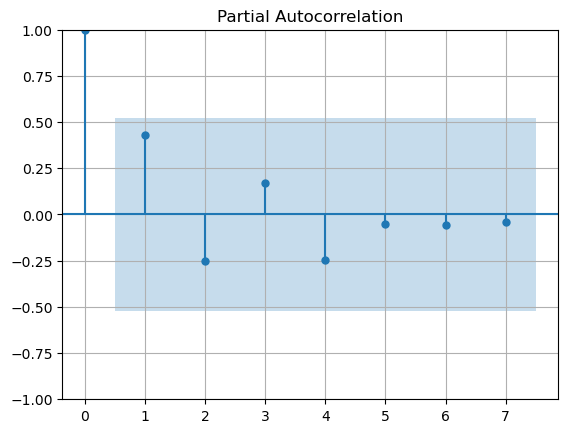

In [44]:
plot_acf(y_train)
plt.grid()
plt.show()
plot_pacf(y_test)
plt.grid()
plt.show()

It looks like we have seasonality with period 12!

In [19]:
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [20]:
def kpss_test(timeseries, trend='c'):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression=trend)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [21]:
def stationarity(s, alpha = 0.05):
    print('-------------------')
    adf_test(s)
    print('-------------------')
    ad_fuller_results = adfuller(s)
    print(f'ad_fuller results: {ad_fuller_results}')
    ad_fuller_pval = ad_fuller_results[1]
    ad_fuller_bool = ad_fuller_pval <= alpha

    print(f'stationarity from ad_fuller test: {ad_fuller_bool}')
    print('-------------------')
    kpss_test_results = kpss(s)
    print(f'kpss results: {kpss_test_results}')
    kpss_pval = kpss_test_results[1]
    kpss_test_bool = kpss_pval >= alpha

    print(f'stationarity from KPSS test: {kpss_test_bool}')
    print('-------------------')

In [46]:
stationarity(y_train)

-------------------
Results of Dickey-Fuller Test:
Test Statistic                 -4.556587
p-value                         0.000155
#Lags Used                      3.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64
-------------------
ad_fuller results: (-4.556587077957644, 0.00015518117863534198, 3, 36, {'1%': -3.626651907578875, '5%': -2.9459512825788754, '10%': -2.6116707716049383}, 683.8347866752413)
stationarity from ad_fuller test: True
-------------------
kpss results: (0.063211753038462, 0.1, 3, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
stationarity from KPSS test: True
-------------------


In [55]:
sarimax_model = sm.tsa.SARIMAX(y_train, order=(1, 0, 0), seasonal_order=(1, 0, 0, 12)).fit()
sarimax_model.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26437D+01    |proj g|=  6.47994D-01

At iterate    5    f=  1.24146D+01    |proj g|=  2.80507D-02

At iterate   10    f=  1.23958D+01    |proj g|=  4.14194D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     24      1     0     0   8.956D-06   1.240D+01
  F =   12.395746715928102     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                  Casual User Count   No. Observations:                   40
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -495.830
Date:                            Wed, 19 Feb 2025   AIC                            997.660
Time:                                    15:15:38   BIC                           1002.726
Sample:                                         0   HQIC                           999.492
                                             - 40                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8823      0.132      6.698      0.000       0.624       1.141
ar.S.L12       0.6475      0.261      2.476      0.013       0.135       1.160
sigma2      5.349e+09   1.01e-11   5.27e+20      0.000    5.35e+09    5.35e+09
===================================================================================
Ljung-Box (L1) (Q):                   9.71   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.00   Prob(JB):                         0.80
Heteroskedasticity (H):               0.25   Skew:                             0.25
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.64e+37. Standard errors may be unstable.
"""

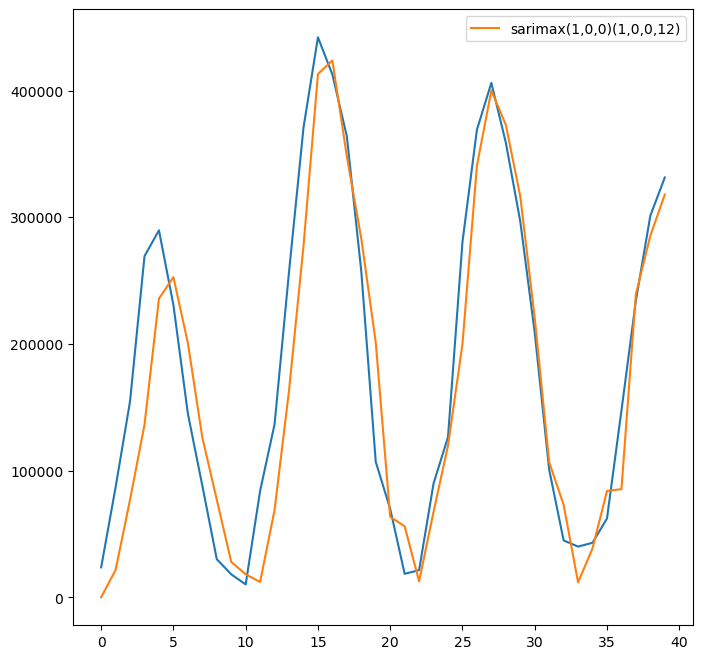

In [56]:
plt.figure(figsize = (8,8))
plt.plot(y_train)
plt.plot(sarimax_model.predict(), label = 'sarimax(1,0,0)(1,0,0,12)')
plt.legend()
plt.show()

In [70]:
forecast = sarimax_model.predict(start = len(y_train), end = len(y_train) + len(y_test) - 1)
forecast

40    292787.330486
41    245390.016074
42    182330.413195
43    106729.405762
44     65668.044667
45     58197.562461
46     56345.124464
47     65414.197585
48    117546.333784
49    171199.832001
50    212309.882885
51    229785.209294
52    203018.404564
53    170747.475908
Name: predicted_mean, dtype: float64

In [71]:
y_test

40    311130
41    261635
42    177071
43     98392
44     51672
45     24460
46     47163
47     82550
48    131810
49        56
50     53905
51    216452
52     93062
53     38369
Name: Casual User Count, dtype: int64

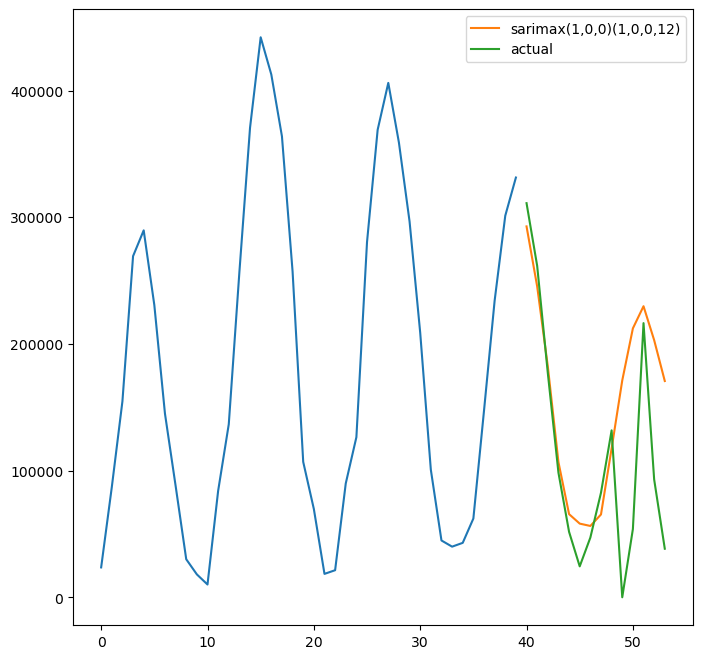

In [75]:
plt.figure(figsize = (8,8))
plt.plot(y_train)
plt.plot(forecast, label = 'sarimax(1,0,0)(1,0,0,12)')
plt.plot(y_test, label = 'actual')
plt.legend()
plt.show()

This SARIMAX model looks pretty good, although the last few months of data have not been looking too normal. This may be a data quality issue or something happened during those months to have reduced the number of casual riders. The peak usage was not too far off prediction, however.

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error, mean_absolute_scaled_error
def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))) * 100
def metrics(y_test, y_pred, y_train):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    smape_y = smape(y_test, y_pred)
    mase = mean_absolute_scaled_error(y_test,y_pred, y_train = y_train)
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"MAPE: {mape}")
    print(f"sMAPE: {smape_y}")
    print(f'MASE: {mase}')
    return mae, mse, mape, smape_y, mase

In [79]:
_ = metrics(y_test, forecast, y_train)

MAE: 51551.17694806182
MSE: 6199114492.647284
MAPE: 219.0119897709448
sMAPE: 50.507351996803884
MASE: 0.8219673211514887


Well, at least the graph looks okay.